In [15]:
import torch
from glob import glob
import os
import numpy as np
from utils import *
from dataset import ImageDataset
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [29]:

class OptimizedImageDataset(torch.utils.data.Dataset):
    def __init__(
        self,
        path,
        device,
        augment=True,
        resize_to=None,
        crop=True,
        crop_size=208,
        verbose=False,
    ):
        self.path = path
        self.device = device
        self.resize_to = resize_to
        self.x, self.y, self.n_samples = None, None, None
        self.augment = augment
        self.crop = crop
        self.crop_size = crop_size
        self.verbose = verbose
        self.N_TRANSFORMS = 6
        self._load_data()

    def __repr__(self) -> str:
        return super().__repr__()

    def _load_data(self):  # not very scalable, but good enough for now
        self.x = glob(os.path.join(self.path, "images") + "/*.png")
        self.y = glob(os.path.join(self.path, "groundtruth") + "/*.png")
        self.n_samples = len(self.x)

    def transform(self, image, mask, index):
        """
        Creates a transform based on the modulo index of the image.

        0. No transform
        1. Horizontal flip
        2. Vertical flip
        3. 90 degree rotation
        4. -90 degree rotation
        5. Random crop
        """

        mod = index % self.N_TRANSFORMS
        if self.verbose:
            print(f"Index: {index}, mod: {mod}")
            desc = f"""
        Type of image: {type(image)}
        Type of mask: {type(mask)}
        Shape of image: {image.shape}
        Shape of mask: {mask.shape}
            """
            print(desc)

        if mod == 0:
            return image, mask

        # Horiztonal flip
        elif mod == 1:
            t_image = TF.hflip(image)
            t_mask = TF.hflip(mask)

        # Vertical flip
        elif mod == 2:
            t_image = TF.vflip(image)
            t_mask = TF.vflip(mask)

        elif mod == 3:
            t_image = TF.rotate(image, angle=-90)
            t_mask = TF.rotate(mask, angle=-90)

        elif mod == 4:
            t_image = TF.rotate(image, angle=90)
            t_mask = TF.rotate(mask, angle=90)

        elif mod == 5:
            _, h_i, w_i = image.shape

            resize_size = (h_i, w_i)
            
            i, j, h, w = transforms.RandomResizedCrop.get_params(
                img=image,
                scale=(0.7, 0.9),
                ratio=(0.9, 1.1),
            )
            t_image = TF.resize(TF.crop(image, i, j, h, w), resize_size)
            t_mask = TF.resize(TF.crop(mask, i, j, h, w), resize_size)

    
        return t_image, t_mask


    def __getitem__(self, index):
        # Unravel index
        if self.crop and self.augment:
            img_index, transform_index, crop_index = np.unravel_index(index, (self.n_samples, self.N_TRANSFORMS, 4))

            if self.verbose:
                print(f"img_index: {img_index}, transform_index: {transform_index}, crop_index: {crop_index}")

        elif self.augment:
            img_index, transform_index = np.unravel_index(index, (self.n_samples, self.N_TRANSFORMS))
            
            if self.verbose:
                print(f"img_index: {img_index}, transform_index: {transform_index}")

        elif self.crop:
            img_index, crop_index = np.unravel_index(index, (self.n_samples, 4))
            if self.verbose:
                print(f"img_index: {img_index}, crop_index: {crop_index}")
        
        else:
            img_index = index

        # Select image and mask
        image = np.array(Image.open(self.x[img_index])).astype(np.float32)[:, :, :3] / 255.0
        image = np.moveaxis(image, -1, 0)
        mask = np.array(Image.open(self.y[img_index])).astype(np.float32) / 255.0
        mask = np.expand_dims(mask, axis=0)

        image_tensor = np_to_tensor(image, self.device)
        mask_tensor = np_to_tensor(mask, self.device)

        if self.crop:
            image_tensor, mask_tensor = crop_to_size_with_crop_index(image_tensor, mask_tensor, crop_index, size=self.crop_size)

        if self.augment:
            image_tensor, mask_tensor = self.transform(image_tensor, mask_tensor, transform_index)

        if self.resize_to:
            image_tensor = TF.resize(image_tensor, self.resize_to)
            mask_tensor = TF.resize(mask_tensor, self.resize_to)

        return image_tensor, mask_tensor

    def __len__(self):
        if self.augment and self.crop:
            return self.n_samples * 4 * self.N_TRANSFORMS
        elif self.crop:
            return self.n_samples * 4
        elif self.augment:
            return self.n_samples * self.N_TRANSFORMS
        else:
            return self.n_samples


torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


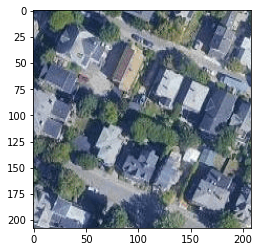

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


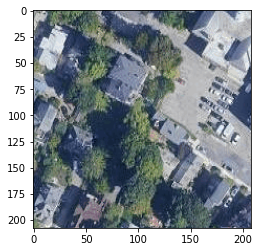

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


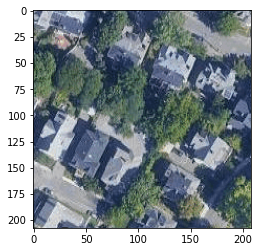

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


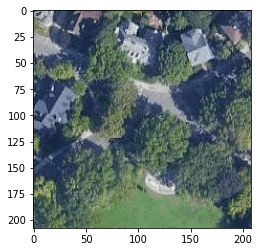

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


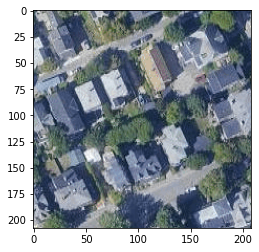

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


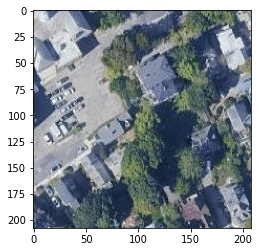

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


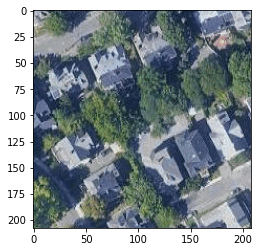

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


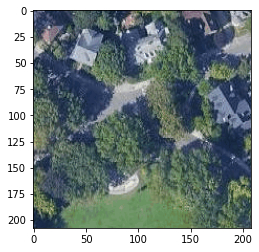

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


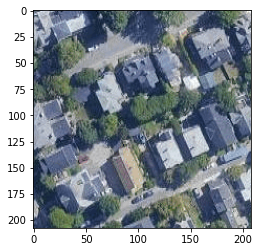

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


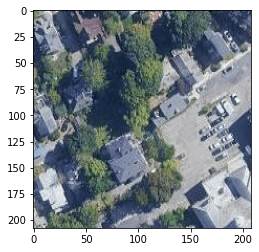

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


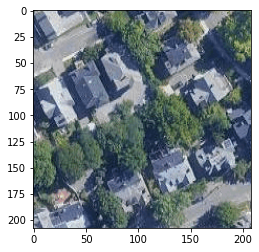

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


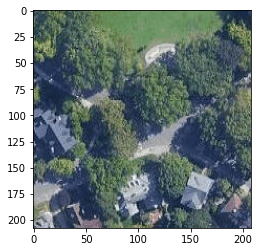

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


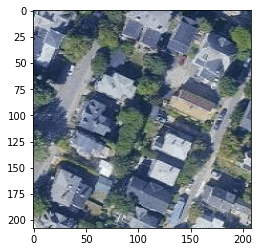

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


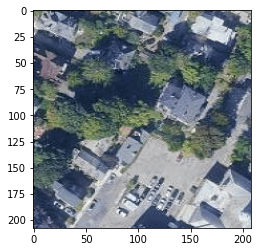

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


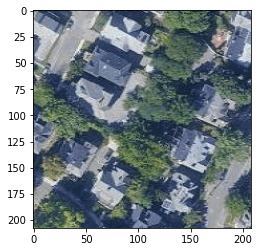

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


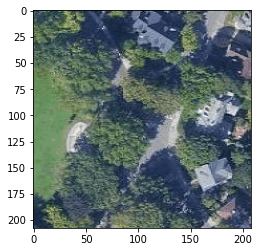

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


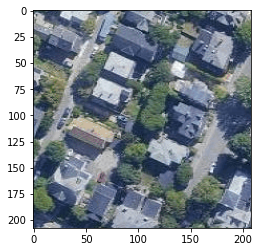

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


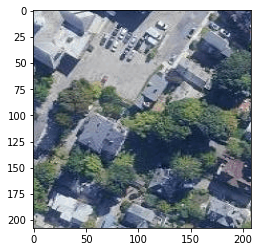

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


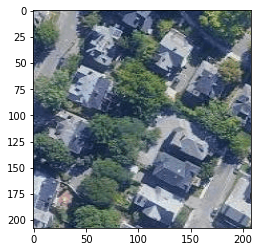

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


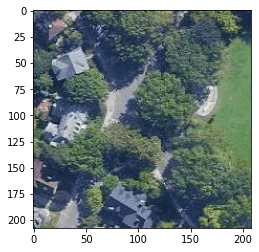

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


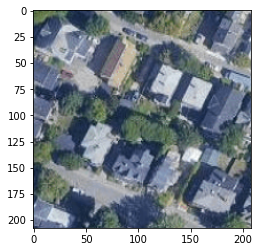

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


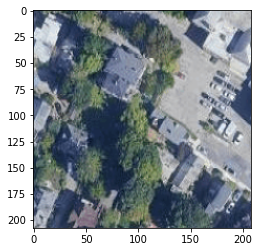

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


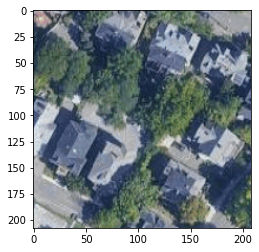

torch.Size([3, 208, 208]) torch.Size([1, 208, 208])


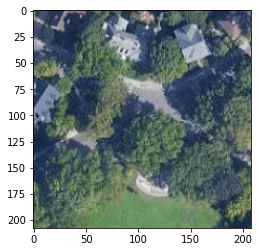

In [30]:
%matplotlib inline
d = OptimizedImageDataset("../data/training/", device="cpu", augment=True, crop=True)

for i in range(24):
    image, mask = d[i]
    img = TF.to_pil_image(image)
    print(image.shape, mask.shape)
    plt.imshow(img)
    plt.show()
    plt.close()

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


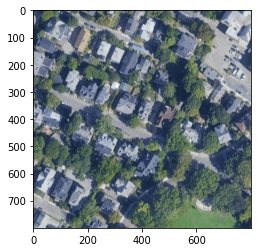

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


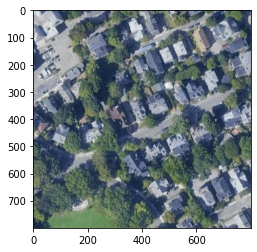

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


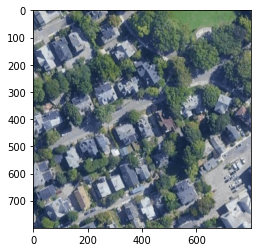

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


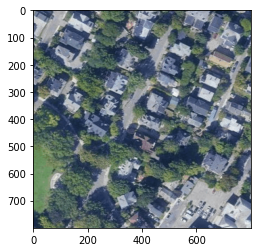

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


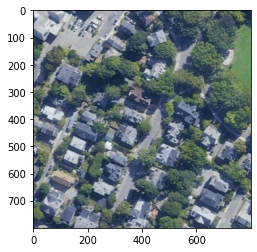

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


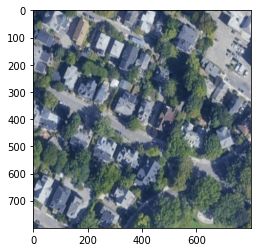

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


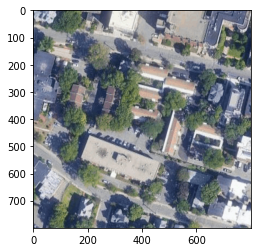

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


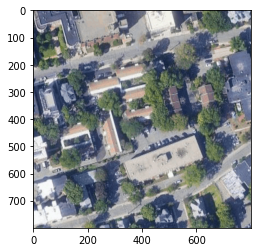

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


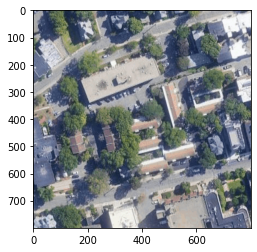

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


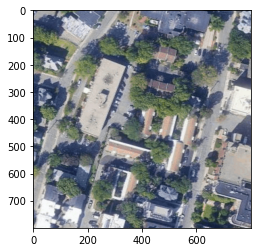

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


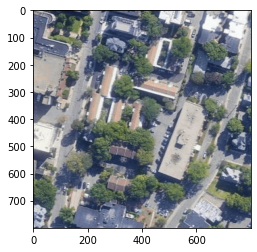

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


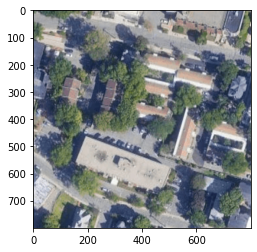

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


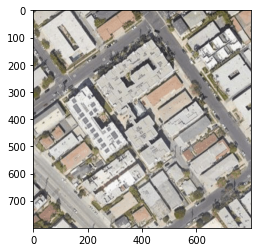

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


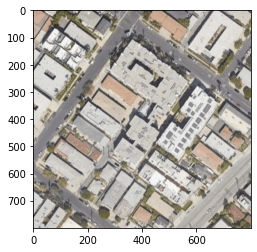

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


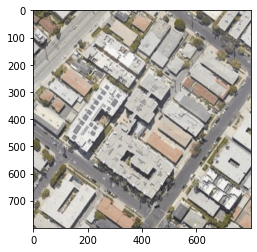

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


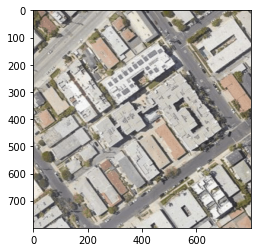

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


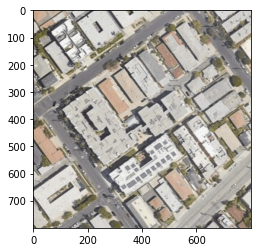

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


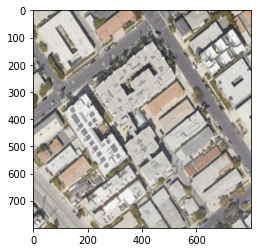

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


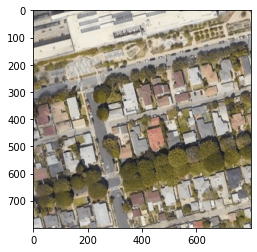

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


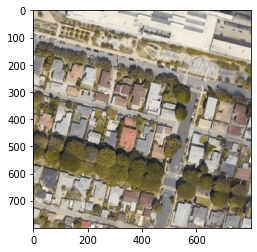

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


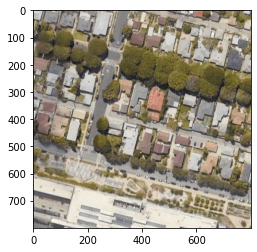

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


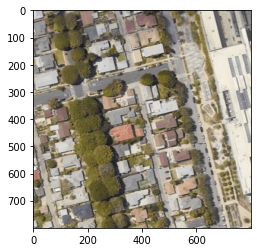

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


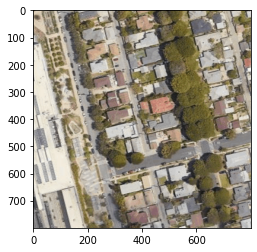

torch.Size([3, 800, 800]) torch.Size([1, 800, 800])


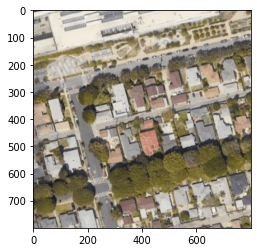

In [31]:
%matplotlib inline
d = OptimizedImageDataset("../data/training/", device="cpu", augment=True, crop=False, resize_to=(800, 800))

for i in range(24):
    image, mask = d[i]
    img = TF.to_pil_image(image)
    print(image.shape, mask.shape)
    plt.imshow(img)
    plt.show()
    plt.close()